### WEkEO Notebook - PART 2: Sea Surface Temperature Map Visualizations
#### Library imports:
######     pip install pip install cartopy
######     pip install regionmask
######     pip install pygeos
######     pip install --upgrade numpy
######     pip install --force-reinstall --no-binary shapely shapely (needed to be installed when shapely gives error)

##### The Map Visualisations follow:
<ol>
<li>
CMEMS REANALYSIS: Summer Seasonal Mean SST in the Adriatic Sea,</li>
Summer Period time selection for 33 years is in the "CMEMS_SST_2DSUMMER_SEASON.nc"
    
https://journals.ametsoc.org/view/journals/phoc/27/8/1520-0485_1997_027_1492_tasgcp_2.0.co_2.xml

<li> 
CMEMS REANALYSIS: Winter Seasonal Mean SST in the Adriatic Sea,</li>
Winter Period time selection for 33 years is in the "CMEMS_SST_2DWINTER_SEASON.nc"
    
https://journals.ametsoc.org/view/journals/phoc/27/8/1520-0485_1997_027_1492_tasgcp_2.0.co_2.xml

<li> 
CMEMS REANALYSIS: Annual Mean SST in the Adriatic Sea,</li>
Annual file over 33 years is prepared for the visualization: "CMEMS_SST_clipped_Annual_Mean.nc"

</ol>


In [1]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import regionmask
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-831ojlom because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Read previously generated files for the Map visualisations:
1. "WEkEO_SST_DATA/CMEMS_SST_2DSUMMER_SEASON.nc"
2. "WEkEO_SST_DATA/CMEMS_SST_2DWINTER_SEASON.nc"
3. "WEkEO_SST_DATA/CMEMS_SST_clipped_Annual_Mean.nc"

And,

4. "WEkEO_SST_DATA/areaAdriatic.csv" to Mask out the missing values from Maps.

The dimension of all files are below.

In [2]:
t_summer = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST_2DSUMMER_SEASON.nc')
t_winter = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST_2DWINTER_SEASON.nc')
t_annual_mean = xr.open_dataset('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/CMEMS_SST_clipped_Annual_Mean.nc')

In [3]:
t_summer,t_winter,t_annual_mean


(<xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
   * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019
 Data variables:
     thetao   (year, lat, lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (lat: 146, lon: 188, year: 33)
 Coordinates:
     depth    float32 ...
   * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
   * lo

In [4]:
file_csv_area_1= pd.read_csv('/home/ozlem/WEkEO_Jupyter_Competition/WEkEO_PART_1_Aggregations/WEkEO_SST_DATA/areaAdriatic.csv')


The xarray.DataArray with Summer Period and geographical coordinates is shown:

In [5]:
temp_summer = t_summer['thetao'][:,:,:]
temp_summer

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

The xarray.DataArray with Winter Period and geographical coordinates is shown:

In [6]:
temp_winter = t_winter['thetao'][:,:,:]
temp_winter

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

And finally, the xarray.DataArray with Annual Mean and geographical coordinates is as follows. The Time period is 33 years as noted before.

In [7]:
temp_annual_mean = t_annual_mean['thetao'][:,:,:]
temp_annual_mean

<xarray.DataArray 'thetao' (year: 33, lat: 146, lon: 188)>
[905784 values with dtype=float32]
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 39.73 39.77 39.81 39.85 ... 45.65 45.69 45.73 45.77
  * lon      (lon) float32 12.17 12.21 12.25 12.29 ... 19.83 19.88 19.92 19.96
  * year     (year) int64 1987 1988 1989 1990 1991 ... 2015 2016 2017 2018 2019

##### Maximum and Minimum Temperatures for each time coverage follow: 

In [8]:
temp_summer_av= np.mean(temp_summer[:],axis = 0)
temp_summer_av.min(),temp_summer_av.max()

(<xarray.DataArray 'thetao' ()>
 array(20.6577, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(25.221352, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [9]:
temp_winter_av= np.mean(temp_winter[:],axis = 0)
temp_winter_av.min(),temp_winter_av.max()

(<xarray.DataArray 'thetao' ()>
 array(9.44431, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(15.3477745, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [10]:
temp_annual_mean_av= np.mean(temp_annual_mean[:],axis = 0)
temp_annual_mean_av.min(),temp_annual_mean_av.max()

(<xarray.DataArray 'thetao' ()>
 array(16.09838, dtype=float32)
 Coordinates:
     depth    float32 1.018,
 <xarray.DataArray 'thetao' ()>
 array(20.021091, dtype=float32)
 Coordinates:
     depth    float32 1.018)

In [11]:
lon_name   = temp_summer.lon[:]
lat_name   = temp_summer.lat[:]

In [12]:
lon_name1   = temp_winter.lon[:]
lat_name1   = temp_winter.lat[:]

In [13]:
lon_name2   = temp_annual_mean.lon[:]
lat_name2   = temp_annual_mean.lat[:]

##### Mask area for the Adriatic Sea during the Summer Season

In [14]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])

In [15]:
mask_pygeos_area_1 = region_area_1.mask(t_summer.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name, lat_name)


In [16]:
thetao_area_1_summer = temp_summer_av.values
thetao_area_1_summer[np.isnan(mask_pygeos_area_1)] = np.nan

In [17]:
thetao_area_1_summer

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 23.820696,
        23.96131 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

##### Mask area for the Adriatic Sea during the Winter Season

In [18]:
mask_pygeos_area_2 = region_area_1.mask(t_winter.thetao, method="pygeos")
LON1, LAT1 = np.meshgrid(lon_name1, lat_name1)


In [19]:
thetao_area_1_winter = temp_winter_av.values
thetao_area_1_winter[np.isnan(mask_pygeos_area_2)] = np.nan

In [20]:
thetao_area_1_winter

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 14.702645,
        14.63934 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

##### Mask area for the Adriatic Sea for the Annual Mean

In [21]:
mask_pygeos_area_3 = region_area_1.mask(t_annual_mean.thetao, method="pygeos")
LON2, LAT2 = np.meshgrid(lon_name2, lat_name2)


In [22]:
thetao_area_1_annual_mean = temp_annual_mean_av.values
thetao_area_1_annual_mean[np.isnan(mask_pygeos_area_3)] = np.nan

In [23]:
thetao_area_1_annual_mean

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan, 19.334784,
        19.379007],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

##### Plot Maps

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


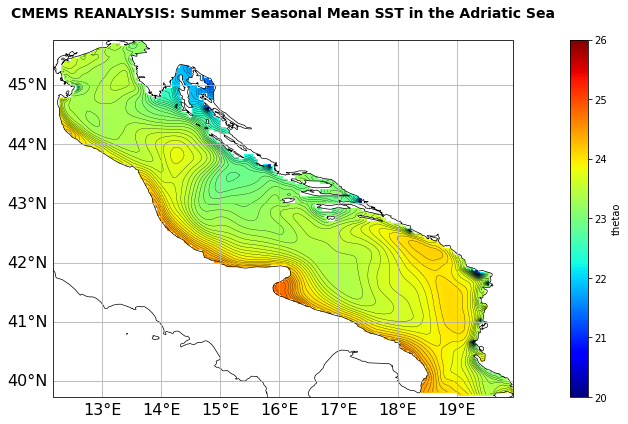

In [24]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_summer_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=20,
    vmax=26
)

lines=temp_summer_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=60)
# the level of contour lines= (vmax-vmin)*10
g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Summer Seasonal Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/SummerSeasonalMean.png')

plt.show()

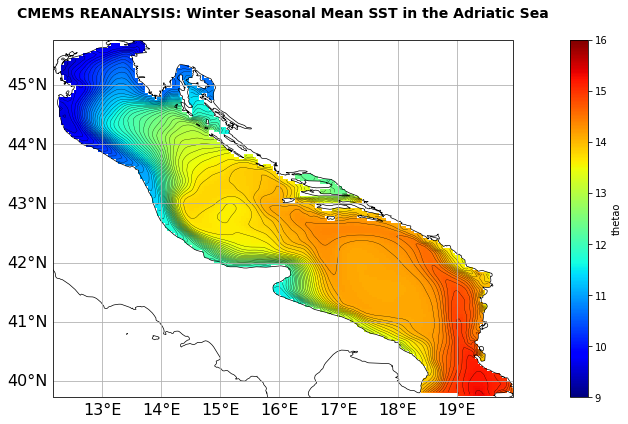

In [25]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_winter_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=9,
    vmax=16
)

lines=temp_winter_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=70)
# the level of contour lines= (vmax-vmin)*10

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Winter Seasonal Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/WinterSeasonalMean.png')

plt.show()

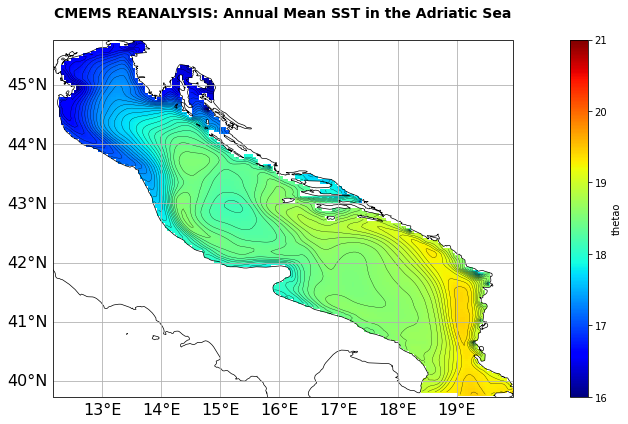

In [27]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())
temp_annual_mean_av.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="jet",
    shading="auto",
    add_colorbar=True,
    vmin=16,
    vmax=21
)

lines=temp_annual_mean_av.plot.contour(ax=ax,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=50)
# the level of contour lines= (vmax-vmin)*10

g1 = ax.gridlines(draw_labels = True)
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


g1.xlabels_top = False
g1.ylabels_right = False
ax.add_feature(cfeature.COASTLINE,linewidths=0.7,alpha=0.9999)



plt.title("CMEMS REANALYSIS: Annual Mean SST in the Adriatic Sea\n",fontweight='bold', size=14)

plt.tight_layout()
plt.savefig('image_outputs/AnnualSeasonalMean.png')

plt.show()